In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

### Read dataset

In [96]:
car_df =  pd.read_csv("../dataset/honda_car_selling.csv")
car_df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


### Exploratory Data Analysis

Getting information of dataset, knowing about columns, their data type and number of non null values in them

In [97]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


We can see there are 999 records and all columns have no missing data. Year has int64 datatype and other columns have object datatype

#### Data Cleaning

As there are no null values or missing value in any of the columns, data is clean. But since ML algorithms can work on numerical data only, we need to convert object data type to respective numerical equivalent.

* cleaning kms driven and price columns

In [98]:
car_df["kms Driven"]=car_df["kms Driven"].str.strip().str.split().str.get(0).astype(int)
car_df["Price"] = car_df["Price"].str.replace(",","").str.strip().str.split().str.get(0).astype(float)
car_df["Price"] =car_df["Price"]*100000

In [99]:
car_df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006,Petrol,Automatic,929000.0,Honda City V CVT
1,2021,11936,Petrol,Automatic,1395000.0,Honda City ZX CVT
2,2018,29635,Petrol,Automatic,995000.0,Honda City i-VTEC CVT ZX
3,2020,16163,Petrol,Automatic,1326000.0,Honda City ZX CVT
4,2015,105114,Petrol,Manual,568000.0,Honda City i VTEC V


In [100]:
print("Number of unique value in Car Model class: ",len(car_df["Car Model"].unique()))
print("-"*34)
print("Unique values and their occurence in Car Model class: ")
print(car_df["Car Model"].value_counts())

Number of unique value in Car Model class:  183
----------------------------------
Unique values and their occurence in Car Model class: 
Car Model
Honda City 1.5 S MT          47
Honda City i VTEC V          38
Honda Amaze S i-Dtech        35
Honda Brio S MT              33
Honda City V MT              26
                             ..
Honda Accord 2.4 M/T          1
Honda Amaze S CVT i-VTEC      1
Honda CR-V Diesel 2WD         1
Honda City Corporate Edit     1
Honda Civic 1.8 V AT Insp     1
Name: count, Length: 183, dtype: int64


The Car Model has more number of words, lets reduce it to 3. Also replace all the spaces present in Fuel Type and Suspension Class

In [101]:
car_df["Fuel Type"]=car_df["Fuel Type"].str.strip()   #removes all spaces present in it
car_df["Suspension"]=car_df["Suspension"].str.strip()   #removes all spaces present in it
car_df["Car Model"] = car_df["Car Model"].str.split(" ").str.slice(start = 0,stop = 3).str.join(" ")  #keeping only first 3 words

##### Outlier Removal


In [102]:
car_df.describe()

,Year,kms Driven,Price
count,999.000000,9.990000e+02,9.990000e+02
mean,2014.717718,6.607667e+04,5.510705e+07
std,3.713756,5.310468e+04,6.652833e+08
min,2000.000000,1.425000e+03,1.000000e+05
25%,2013.000000,3.534100e+04,3.350000e+05
50%,2015.000000,5.990000e+04,5.150000e+05
75%,2017.000000,8.528750e+04,7.105000e+05
max,2023.000000,1.100000e+06,9.500000e+09


We can clearly see that there exists some outliers in Price and kms Driven classes. The maximum value present is way higher than third quartile value. We have to get rid of those outliers.

Lets say the max value of kms Driven be 15 lakh, we set it to be Q3+ 1.5 time InterQuartile Range

And max value for Price be 13 lakh.

In [103]:
car_df = car_df[car_df["Price"]<1300000]
car_df = car_df[car_df["kms Driven"]<150000]
car_df.describe()

,Year,kms Driven,Price
count,941.000000,941.000000,9.410000e+02
mean,2014.647184,62684.613177,5.299904e+05
std,3.573970,32153.656720,2.460956e+05
min,2000.000000,2000.000000,1.000000e+05
25%,2013.000000,36000.000000,3.300000e+05
50%,2015.000000,59900.000000,5.050000e+05
75%,2017.000000,82709.000000,6.950000e+05
max,2023.000000,149990.000000,1.296000e+06


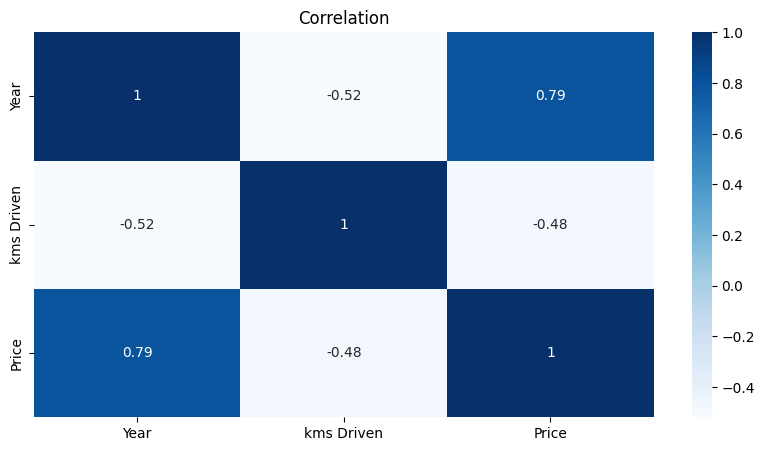

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(car_df.select_dtypes("number").corr(),annot=True,cmap="Blues")
plt.title("Correlation")
plt.show()

There is no so high correlation among ant two variables

#### Data Visualization

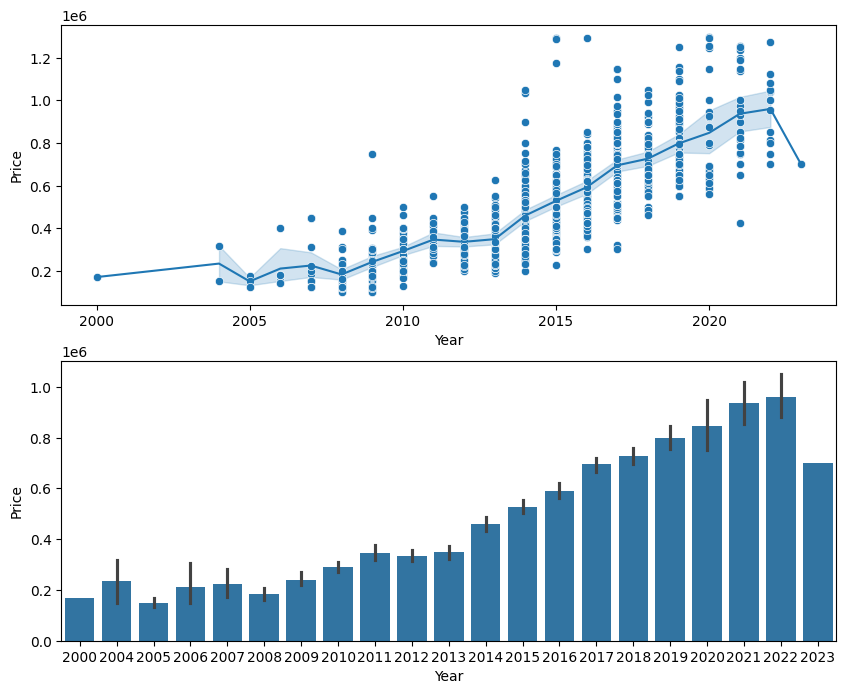

In [105]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.lineplot(x = 'Year',y = 'Price',data = car_df)
sns.scatterplot(x = 'Year',y = 'Price',data = car_df)

plt.subplot(2,1,2)
sns.barplot(x = 'Year',y = 'Price',data = car_df)
plt.show()

We can simply observe that with year the price of car is increasing.

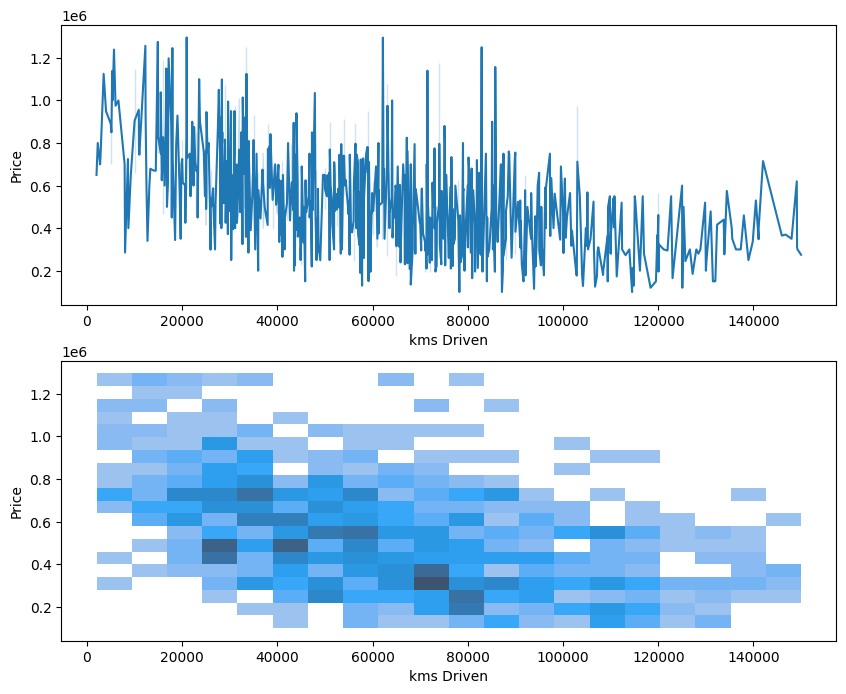

In [106]:
plt.figure(figsize=(10,4))
sns.lineplot(y = 'Price',x = 'kms Driven',data = car_df)
#sns.scatterplot(y = 'Price',x = 'kms Driven',data = car_df)


We can see that more the kms driven lower is the price

#### Dummy Variable Insertion

While creating one of the drop variable category in each dummy variable is removed to remove dummy variable trap.

In [107]:
dummy_var_for_fuel = pd.get_dummies(car_df["Fuel Type"],dtype="int",drop_first=True)
dummy_var_for_fuel.head()

,Diesel,Petrol
0,0,1
2,0,1
4,0,1
5,1,0
6,1,0


In [108]:
dummy_var_for_suspension = pd.get_dummies(car_df["Suspension"],dtype="int",drop_first=True)
dummy_var_for_suspension.head()

,Manual
0,0
2,0
4,1
5,1
6,1


In [109]:
dummy_var_for_car_model = pd.get_dummies(car_df["Car Model"],dtype="int",drop_first=True)
dummy_var_for_car_model.head()

,Honda Accord VTi-L,Honda Amaze E,Honda Amaze EX,Honda Amaze Exclusive,Honda Amaze S,Honda Amaze SX,Honda Amaze V,Honda Amaze VX,Honda Amaze i-DTEC,Honda BR-V i-DTEC,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Let's concat dummy variables with car_df into newDataframe and replace original Fuel type and Suspension COlumns

In [110]:
new_merged_df = pd.concat([car_df,dummy_var_for_fuel,dummy_var_for_suspension,dummy_var_for_car_model],axis="columns")
new_merged_df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model,Diesel,Petrol,Manual,Honda Accord VTi-L,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
0,2019,19006,Petrol,Automatic,929000.0,Honda City V,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,29635,Petrol,Automatic,995000.0,Honda City i-VTEC,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,105114,Petrol,Manual,568000.0,Honda City i,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2015,101466,Diesel,Manual,565000.0,Honda City i,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2016,52456,Diesel,Manual,560000.0,Honda Jazz 1.5,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
#drop Fuel Type and Suspension column

new_merged_df.drop(columns=["Fuel Type","Suspension","Car Model"],inplace=True)
new_merged_df.head()

,Year,kms Driven,Price,Diesel,Petrol,Manual,Honda Accord VTi-L,Honda Amaze E,Honda Amaze EX,Honda Amaze Exclusive,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
0,2019,19006,929000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,29635,995000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,105114,568000.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2015,101466,565000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2016,52456,560000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# #scale the input features
# for col in new_merged_df.columns:
#     new_merged_df[col]= (new_merged_df[col] - new_merged_df[col].min())/(new_merged_df[col].max()-new_merged_df[col].min())

# new_merged_df.fillna(0,inplace=True)
# new_merged_df.head()

### Model Training

In [113]:
#for spitiing data into training and testing data
from sklearn.model_selection import train_test_split   
#imprting class of model to be trained
from sklearn.linear_model  import LinearRegression
#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import mean_squared_error, r2_score

In [114]:
# all input features to train
input_features = new_merged_df.drop(columns=["Price"])
#the final target variable to predict
target = new_merged_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

In [115]:
#instantiating the model
model = LinearRegression()

In [116]:
model.fit(X_train,y_train)

LinearRegression()

In [117]:
print("Training Accuracy:",model.score(X_train,y_train))
print("Testing Accuracy: ", model.score(X_test,y_test))

print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)))

Training Accuracy: 0.8804972127268605
Testing Accuracy:  0.8836033232686542
Test MSE: 7894041091.582845


In [118]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the hyperparameter grid
param_grid = {'alpha': [0.001,0.01,0.1, 0.15,0.2,0.25,0.5,0.3,1.0, 10.0,0.35,0.40]}

# Create the linear regression model
model = Ridge()

# Create the cross-validation iterator
kf = KFold(n_splits=8, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best Alpha:", best_alpha)
print("Test MSE:", mse)

print("Training Accuracy:",best_model.score(X_train,y_train))
print("Testing Accuracy: ", best_model.score(X_test,y_test))


Best Alpha: 0.4
Test MSE: 8096335664.713951
Training Accuracy: 0.8785362815175722
Testing Accuracy:  0.8806205143676018
